In [2]:
#Importamos las librerías necesarias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.cluster
import umap
import sklearn.cluster

#Cargamos el archivo a utilizar
X = pd.read_csv('traini.csv')


In [16]:
reducer = umap.UMAP(n_neighbors=20)

In [19]:

reducer.fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 5 separate connected components using meta-embedding (experimental)
  n_components
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=20, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [20]:
embedding = reducer.transform(X)

Puede verse una tendencia a asociarse los datos, o por lo menos forman una linea continua, lo que yo interpreto como pequeñas variaciones entre ellos.

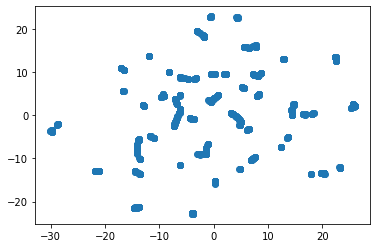

In [21]:

plt.scatter(embedding[:,0], embedding[:,1])

In [24]:
# clusters sobre los resultados de umap
n_clusters = 20
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster

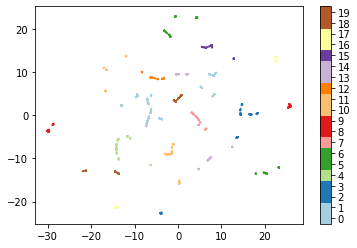

In [27]:
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(21)-0.5).set_ticks(np.arange(300))

Es claro que sí existen materiales que se encuentran totalmente agrupados, sin embargo  revisaremos de cerca la región entre -5 y 0 en x.

C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 14 separate connected components using meta-embedding (experimental)
  n_components


(-5, 0)

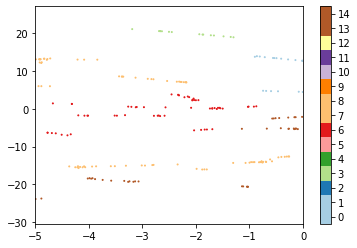

In [82]:

n_clusters = 15
reducer = umap.UMAP(n_clusters, min_dist =0.8)
reducer.fit(X)
# clusters sobre los resultados de tsne

k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(n_clusters+1)-0.5).set_ticks(np.arange(300))
plt.xlim(-5,0)

Al revisar más de cerca se pueden ver agrupaciones de puntos, lo que es equivalente a decir de que
sí hay configuraciones de materiales que comparten características y los situan muy cerca al menos en nuestra proyección 2D

C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 14 separate connected components using meta-embedding (experimental)
  n_components


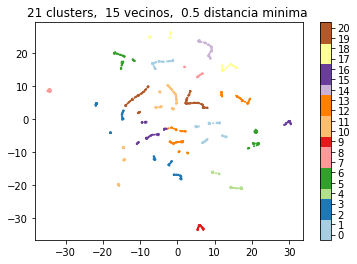

C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 14 separate connected components using meta-embedding (experimental)
  n_components


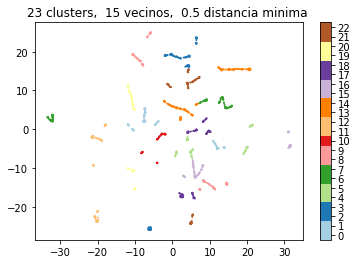

C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 14 separate connected components using meta-embedding (experimental)
  n_components


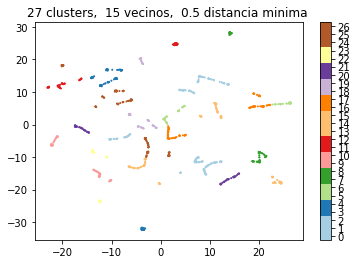

In [79]:
#Ahora realizamos el mismo procedimiento anterior pero con diferentes n_neighbors, min_dist y metric:
#Vamos a tomar números aleatorios en las variables de numero de vecinos, distancia mínima y métrica


numcluster=np.random.randint(14,30,3)
numvec=np.random.randint(5,15,3)
distmin=np.random.rand(3)



for i  in range(3):
    # clusters sobre los resultados de tsne
    reducer = umap.UMAP(n_neighbors=15,  min_dist=0.5 )
    reducer.fit(X)
    embedding = reducer.transform(X)
    n_clusters = numcluster[i]
    k_means = sklearn.cluster.KMeans(n_clusters)
    k_means.fit(embedding) # training
    cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
    distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
    plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(n_clusters+1)-0.5).set_ticks(np.arange(300))
    plt.title(str(n_clusters)+' clusters, '+' 15 vecinos, '+' 0.5 distancia minima ')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 19 separate connected components using meta-embedding (experimental)
  n_components


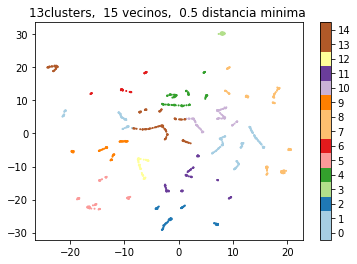

C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 15 separate connected components using meta-embedding (experimental)
  n_components


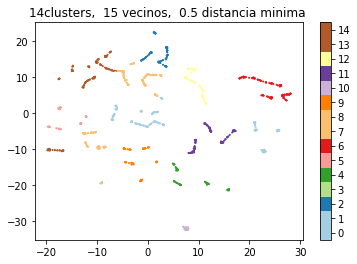

C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 58 separate connected components using meta-embedding (experimental)
  n_components


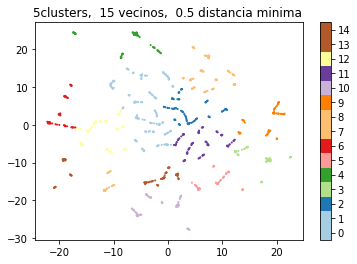

In [81]:
for i  in range(3):
    # clusters sobre los resultados de tsne
    reducer = umap.UMAP(n_neighbors=numvec[i],  min_dist=0.5 )
    reducer.fit(X)
    embedding = reducer.transform(X)
    n_clusters = 15
    k_means = sklearn.cluster.KMeans(n_clusters)
    k_means.fit(embedding) # training
    cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
    distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
    plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(n_clusters+1)-0.5).set_ticks(np.arange(300))
    plt.title(str(numvec[i])+'clusters, '+' 15 vecinos, '+' 0.5 distancia minima ')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 14 separate connected components using meta-embedding (experimental)
  n_components


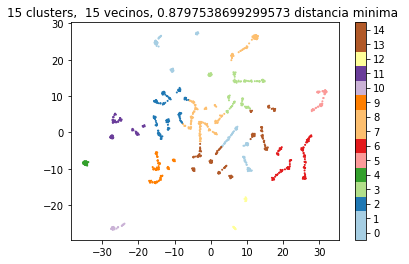

C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 14 separate connected components using meta-embedding (experimental)
  n_components


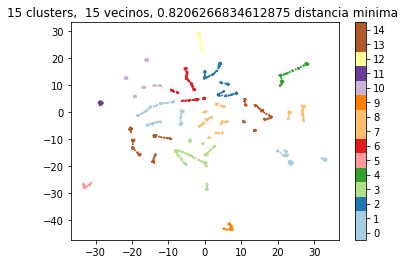

C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 14 separate connected components using meta-embedding (experimental)
  n_components


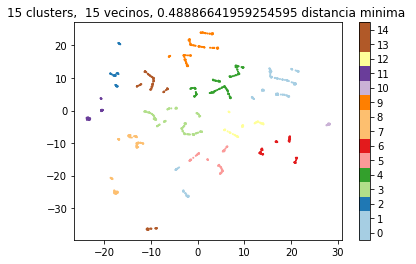

In [85]:
for i  in range(3):
    # clusters sobre los resultados de tsne
    reducer = umap.UMAP(n_neighbors=15,  min_dist=distmin[i] )
    reducer.fit(X)
    embedding = reducer.transform(X)
    n_clusters = 15
    k_means = sklearn.cluster.KMeans(n_clusters)
    k_means.fit(embedding) # training
    cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
    distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
    plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(n_clusters+1)-0.5).set_ticks(np.arange(300))
    plt.title('15 clusters, '+' 15 vecinos, '+str(distmin[i])+' distancia minima ')
    plt.show()